In [1]:
import pandas as pd
df = pd.read_csv('/Users/casa/Documents/FF/routeScoreFinal.csv',names=['s1','s2','score','dist'])
print(df.shape)
print(df.head())
dfp = pd.read_csv('/Users/casa/Documents/FF/teF.csv')
print(dfp.shape)
print(dfp.head())
new_df = pd.merge(dfp, df,  how='left', left_on=['s1','s2'], right_on = ['s1','s2'])
print(new_df.shape)
print(new_df.head(20))

(843, 4)
    s1   s2  score  dist
0  538  537    0.0   125
1  137  136    0.0   213
2  260  259    0.0   200
3  623  532    0.0   125
4  558  222    0.0   100
(237973, 8)
   s1  s2     distc     pearc     speac        te  direction   timestamp
0   6   5  0.245330  0.754670  0.808405  0.127175          1  01/01/2017
1   6   5  0.086547  0.913453  0.939917  0.107228          2  02/01/2017
2   6   5  0.037344  0.962656  0.963367  0.104841          2  03/01/2017
3   6   5  0.041158  0.958842  0.955418  0.000000          0  04/01/2017
4   6   5  0.037523  0.962477  0.962141  0.097281          2  05/01/2017
(237973, 10)
    s1  s2     distc     pearc     speac        te  direction   timestamp  \
0    6   5  0.245330  0.754670  0.808405  0.127175          1  01/01/2017   
1    6   5  0.086547  0.913453  0.939917  0.107228          2  02/01/2017   
2    6   5  0.037344  0.962656  0.963367  0.104841          2  03/01/2017   
3    6   5  0.041158  0.958842  0.955418  0.000000          0  04/01/2

In [ ]:
dupdf=df[['s1','s2']].duplicated()
dupdf= ~dupdf
print(dupdf.head())

In [ ]:
#df['timestamp'] =pd.to_datetime(df.timestamp)
#df[dupdf].sort_values(by=['s1','s2'],ascending=True)
#df[dupdf].sort_values(by=['idclass'],ascending=True).head(100)
#df[dupdf].to_csv('/Users/casa/Documents/FF/finalClustertNR.csv',sep=',')
df[dupdf].shape
#df.sort_values(by=['s1','s2'],ascending=True).head(10)

In [ ]:
df['idclass'] = df.groupby(['value','quad','cluster'], sort=False).ngroup() + 1
#df.groupby(['value','quad','cluster'], sort=True).head(10)

In [ ]:
df.sort_values(by=['s1','s2','timestamp'],ascending=True).head(10)

In [ ]:
#df.to_csv('/Users/casa/Documents/FF/finalClustert.csv',sep=',')
#df[['idclass','s1']].groupby(['idclass']).count()
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axes = plt.subplots(212)
#fig.set_size_inches(14.5, 7.5)
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.rcParams['figure.figsize']=(10,10)
#lst = ['quad','value','cluster']
lst = ['distc','pearc','speac']
eq = [212,221,222]
j=0
dfi=new_df[new_df['dist']!=0]
print(dfi.shape)
for i in lst:
    seq = ''
    ax = plt.subplot(eq[j])
    plt.title(str(i))
    j=j+1
    ax = sns.distplot(dfi[i],
                      bins=20,
                      kde=False,
                      color='blue',
                      hist_kws={"linewidth": 20,'alpha':1,"color": "gray"})

In [ ]:



fig, axes = plt.subplots(4, 4)
fig.set_size_inches(25.5, 15.5)
fig.subplots_adjust(hspace=0.4, wspace=0.4)



for i in range(1,15):
    ax = fig.add_subplot(4, 4, i)
    plt.title(str(i))
    ax = sns.distplot(df['corr'][df['quad']==i],
                  bins=20,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 20,'alpha':1,"color": "gray"})

In [ ]:
print(df[df['score']==max(df['scorec'])])
df1=df.sort_values(by=['scorec'],ascending=True)[0:500]
ax = sns.distplot(df1['scorec'],
      bins=50,
      kde=True,
      color='blue',
      hist_kws={"linewidth": 20,'alpha':1,"color": "gray"})


In [ ]:
ax = sns.regplot(x="score", y="speac",
                 data=dfd[dfd['direction']!=0], scatter_kws={'alpha':0.05},fit_reg=False)

In [ ]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#jointplot
sns.scatterplot(x="score", y="speac",
                palette=cmap,
                sizes=(1, 8), linewidth=0,
                data=dfd[dfd['direction']==1])

In [ ]:
dfd=new_df.copy()
print(dfd.head())
mask = dfd.direction == 2
dfd.loc[mask, 'direction']=1
print(dfd.head())

In [ ]:
import numpy as np
#grouped = new_df.groupby(['s1','s2','direction'])
#grouped = new_df.groupby(['s1','s2','speac']).mean()
print(new_df.groupby(['speac']).max().sort_values(by=['s1','s2'],ascending=True).head(10))
#grouped.speac.mean().head(50)


In [ ]:
dfd.sort_values(by=['s1','s2','timestamp'],ascending=True).head(10)

In [ ]:
df = pd.read_csv('/Users/casa/Documents/FF/avgsum.csv',names=['month','day','total'])
print(df.shape)
df.total=df.total*288
print(df.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
importnumpy as np
ff = df.pivot("month","day","total")
plt.rcParams['figure.figsize']=(20,7)
#plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.5)
ax = sns.heatmap(ff)
ax.figure.axes[-1].set_ylabel('FF daily average', size=20)
ax.set(xlabel='Day',ylabel="")
plt.yticks(np.arange(0, 12, step=1), ('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec'),rotation=0)
for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(15)

plt.savefig('/Users/casa/Documents/FF/img/heatmap.png', dpi=200)

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

In [ ]:
flights = flights.pivot("month","year","passengers")
ax = sns.heatmap(flights)

In [ ]:
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
ts = pd.Series(df['total'].values)
ts.head()

In [ ]:
result = seasonal_decompose(ts, model='additive', freq=7)
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams["axes.labelsize"] = 20
result.plot()
#plt.show()
plt.savefig('/Users/casa/Documents/FF/img/tsdec.png', dpi=200)

In [302]:
df = pd.read_csv('/Users/casa/Documents/FF/teF.csv')
#df.sort_values(by=['timestamp'],ascending=True)
df['uindex']=df['s1'].astype(str)+"_"+df['s2'].astype(str)
#str(df['s1'])#+'-'+str(df['s2'])
print(df.shape)
df['timestamp'] = pd.to_datetime(df['timestamp'],format="%d/%m/%Y")
df['timestamp'] = [time.date() for time in df['timestamp']]
tdf = df[df['uindex']=='125_98']
idx = pd.DatetimeIndex(tdf.timestamp)
series = pd.Series(tdf.direction.values,index=idx)

print(series.head())

(237973, 9)
timestamp
2017-01-01    2
2017-01-02    1
2017-01-03    1
2017-01-04    1
2017-01-05    0
dtype: int64


In [309]:
tdf = df[df['uindex']=='7_5']
idx = pd.DatetimeIndex(tdf.timestamp)
series = pd.Series(tdf.direction.values,index=idx)
print(series.head())

timestamp
2017-01-01    2
2017-01-02    2
2017-01-03    2
2017-01-04    2
2017-01-05    2
dtype: int64


In [310]:
#print(series.tail(30))
#series.to_csv('/Users/casa/Documents/FF/series.csv')
a=series.resample('D').mean()
a = a.reset_index(name='direction')
ndf = pd.DataFrame(data=a)
ndf['uindex']='7_5'
print(ndf.head())
print(ndf.shape)

   timestamp  direction uindex
0 2017-01-01        2.0    7_5
1 2017-01-02        2.0    7_5
2 2017-01-03        2.0    7_5
3 2017-01-04        2.0    7_5
4 2017-01-05        2.0    7_5
(365, 3)


In [342]:
#tmpdf =  df.iloc[0:721]
uvalues = df['uindex'].unique().tolist()

ff = pd.DataFrame({'uindex':[],'timestamp':[],'direction':[]})
for row in uvalues:
    print(row)
    tdf = df[df['uindex']==row]
    idx = pd.DatetimeIndex(tdf.timestamp)
    series = pd.Series(tdf.direction.values,index=idx)
    a=series.resample('D').mean()
    a = a.reset_index(name='direction')
    ndf = pd.DataFrame(data=a)
    ndf['uindex']=row
    ff=ff.append(ndf)
    
#tmp=newdf[newdf['uindex']=='106_11']
print(ff.tail())
#from datetime import datetime as dt
#df['timestamp'] = pd.to_datetime(df['timestamp'])
#df['timestamp'] = [time.date() for time in df['timestamp']]
#ff = pd.pivot_table(df,index='uindex',columns='timestamp',values= 'direction').rename_axis(None,1)
#ff[ff.index=='106_11']
#print(ff.head())

6_5
7_5
7_6
12_6
12_7
45_43
46_43
46_45
47_43
47_45
47_46
53_5
53_6
53_7
53_12
54_43
54_45
54_47
62_5
62_7
62_12
62_53
78_5
78_7
78_12
78_53
84_2
84_11
102_57
106_2
106_11
106_84
113_112
114_113
115_113
115_114
116_114
116_115
117_114
117_115
118_115
118_116
118_117
125_98
125_109
130_123
131_108
137_136
145_113
145_144
146_113
146_115
146_116
146_117
148_5
148_6
148_7
148_12
148_53
148_78
153_152
157_148
165_164
168_166
175_174
178_176
186_39
186_182
187_38
192_191
193_191
193_192
194_193
195_191
195_192
196_191
196_192
197_191
197_192
198_192
198_193
198_195
198_196
198_197
199_192
199_193
199_195
199_196
199_197
200_191
200_192
200_198
203_192
203_193
203_195
203_196
203_197
203_200
204_192
204_193
204_195
204_196
204_197
204_200
205_193
205_198
205_200
205_203
205_204
206_191
206_193
206_195
206_196
206_197
206_200
206_205
207_191
207_192
207_198
207_203
207_204
207_206
212_103
212_109
212_134
219_218
225_223
226_225
235_234
236_234
236_235
237_234
237_235
241_240
242_241
243_218
2

In [407]:
p = ff.pivot_table(index='uindex',columns='timestamp',values='direction',fill_value=-1)
#p.to_csv('/Users/casa/Documents/FF/pivot.csv')
p.iloc[0:2,0:2]

timestamp,2017-01-01 00:00:00,2017-01-02 00:00:00
uindex,,
102_57,1,1
106_11,0,1


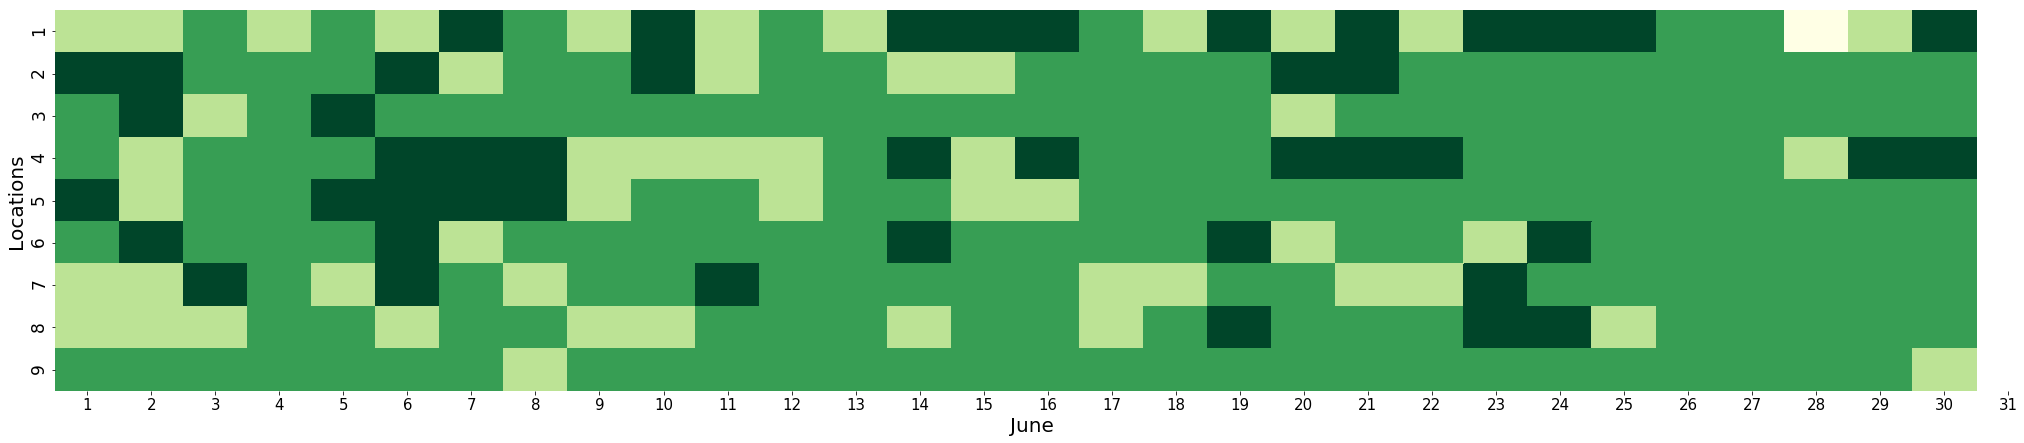

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plts
plt.rcParams['figure.figsize']=(35,7)
plt.rcParams["axes.labelsize"] = 20
#plt.imshow(p.iloc[127:153,0:30],cmap="Greys")
#locations 144:153
ax=sns.heatmap(p.iloc[144:153,151:181],cmap="YlGn",xticklabels=range(1,32),yticklabels=range(1,10),cbar=False)
ax.set(xlabel='June',ylabel="Locations")
for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(17)
for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(15)

#plt.savefig('/Users/casa/Documents/FF/img/decemberTE.png', dpi=200)

#sns.heatmap(p.iloc[144:153,185:215],cmap="YlGn")

#sns.heatmap(p.iloc[144:153,334:365],cmap="YlGn")'



In [82]:
dirset = df.groupby(['s1','s2','direction'],as_index=False).count()
print(dirset.head(10))
dirset.iloc[0]

   s1  s2  direction  distc  pearc  speac   te  timestamp
0   6   5          0     84     84     84   84         84
1   6   5          1    168    168    168  168        168
2   6   5          2    111    111    111  111        111
3   7   5          0     34     34     34   34         34
4   7   5          1     32     32     32   32         32
5   7   5          2    292    292    292  292        292
6   7   6          0     12     12     12   12         12
7   7   6          1      8      8      8    8          8
8   7   6          2    339    339    339  339        339
9  12   6          0     33     33     33   33         33


s1            6
s2            5
direction     0
distc        84
pearc        84
speac        84
te           84
timestamp    84
Name: 0, dtype: int64

In [95]:
dirset.sort_values('te', ascending=False).drop_duplicates(['s1','s2']).sort_values('s1').head(10)

,s1,s2,direction,distc,pearc,speac,te,timestamp
1,6,5,1,168,168,168,168,168
8,7,6,2,339,339,339,339,339
5,7,5,2,292,292,292,292,292
11,12,6,2,279,279,279,279,279
14,12,7,2,135,135,135,135,135
17,45,43,2,230,230,230,230,230
22,46,45,1,245,245,245,245,245
19,46,43,1,182,182,182,182,182
26,47,43,2,163,163,163,163,163
28,47,45,1,199,199,199,199,199
